# 서포트 벡터 머신 연습

#####  

서포트 벡터 머신을 공부하고 교재를 따라 와인을 분류하는 classifier 실습을 했었다.

그리고 보스턴 집값을 예측해보는 것을 했는데 사이킷런에서 제공하는 데이터셋으로 해본 결과가 만족스럽지 않았다.

곧 사라질 예정이라고 하는데, 대체 셋으로 Clifornia housing dataset이 있었다.

이를 활용해서 해보려고 한다.

# Dataset import
## 데이터 불러오기

이전에 사이킷런에서 안내된 대로 데이터를 불러오기로 한다.

In [1]:
import pandas as pd
import numpy as np

# from sklearn import datasets

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

shape나 type이 먹히지 않는 상태. 피처 이름들을 살펴본다.

In [2]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [3]:
housing.data.shape

(20640, 8)

# 피처, 타깃 데이터 지정

In [4]:
X = housing.data
y = housing.target

## 트레이닝, 테스트 데이터 분할

In [5]:
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

## 데이터 표준화

In [6]:
from sklearn.preprocessing import StandardScaler

# X 트레이닝 데이터 기준으로 Xtn Xte 를 표준화한다.
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# 서포트 벡터 회귀 모델

## 모델링
### 데이터 학습 (kernel = 'linear')

In [7]:
from sklearn import svm
clf_svr_lr = svm.SVR(kernel = 'linear')               # SVR 메소드를 이용해 분류 문제에 적용. 분류라면 SVC.
clf_svr_lr.fit(X_tn_std, y_tn)

SVR(kernel='linear')

kernel 종류는 SVC와 마찬가지로 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' 등이 있다.

### 추정계수 및 상수항 확인

결국 선형으로 된 수식을 이용하기 때문에 있을 것이라 생각하여 구해본다.

In [8]:
# 추정계수 확인

print(clf_svr_lr.coef_)

[[ 0.89056714  0.09417056 -0.35703063  0.43554646  0.01645517 -0.80692713
  -0.76967105 -0.75356726]]


In [9]:
# 상수항 확인

print(clf_svr_lr.intercept_)

[1.9481278]


상당히 작은 상수항이다. 뭐 데이터 스케일에 따라 다른 것이긴 하지만

### 데이터 예측

In [10]:
svr_lr_pred = clf_svr_lr.predict(X_te_std)
print(svr_lr_pred)

[1.99326488 2.64035122 1.82543239 ... 2.18160434 2.8665794  2.71869329]


## 평가

### R-square, MSE

regression이기 때문에 r제곱값과 MSE로 모형 평가를 하도록 한다.

r제곱값은 높은 값을 가질수록 좋은 성능을 의미하며, MSE는 작을수록 좋은 성능을 의미한다.

In [11]:
from sklearn.metrics import r2_score

r2 = r2_score(y_te, svr_lr_pred)
print(r2)

-2.5514591714480774


r2는 클수록 좋으며 1에 가까울 수록 좋은 것. 음수도 될 수 있다는 것을 잊으면 안됐다.

`sklearn.metrics.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')`

> R^2 (coefficient of determination) regression score function.

> Best possible score is 1.0 and **it can be negative** (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.



In [12]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_te, svr_lr_pred)
print(mse)

4.694498628934258


mse는 작은 편에 속하지만 데이터 자체에 비해서는 그렇게 작은 값은 아닐지도.

### 예측값 및 실제값 비교

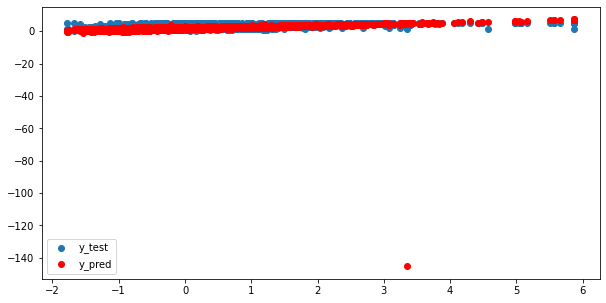

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#예측값과 실제값의 분포
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 0], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 0], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

한 개의 예측값이 상당히 문제 있어보인다. 무슨 일일까.

In [14]:
svr_lr_pred.min()

-145.3494382311743

어쩌다 이런 값이 나왔을까, 다른 피처들로도 본다.

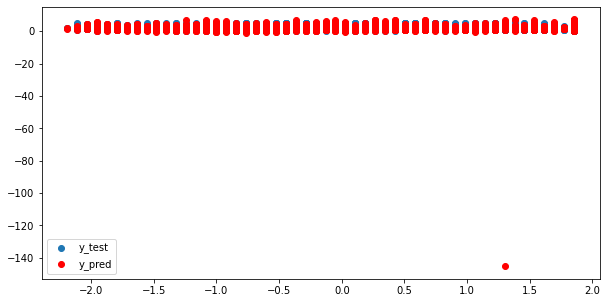

In [15]:
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 1], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 1], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

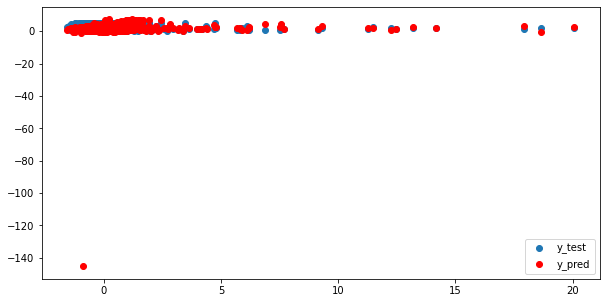

In [16]:
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 2], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 2], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

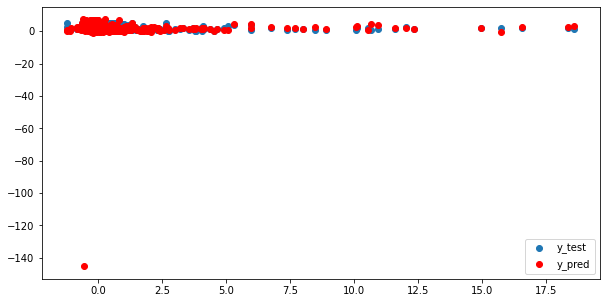

In [17]:
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 3], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 3], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

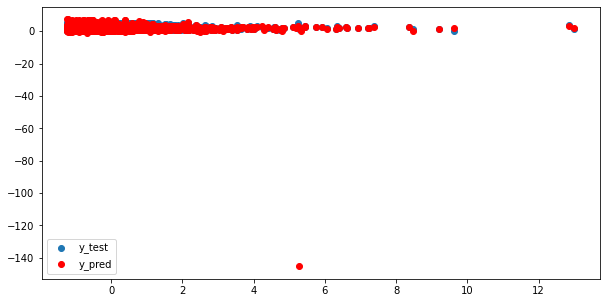

In [18]:
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 4], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 4], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

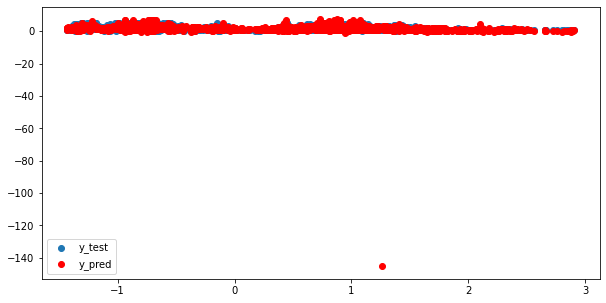

In [19]:
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 6], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 6], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

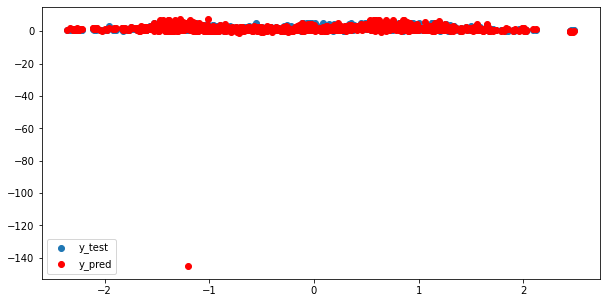

In [20]:
plt.figure(figsize=(10, 5))                                            #표 크기 지정
plt.scatter(X_te_std[::, 7], y_te, label='y_test')                     #파란점, 실제값
plt.scatter(X_te_std[::, 7], svr_lr_pred, c='r', label='y_pred')       #빨간점, 예측값
plt.legend(loc='best')                           #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

대체적으로 잘 예측이 된 것 처럼 보이지만 저 값 하나가 크게 흐리고 있다. 

이를 해결하기 위해 데이터프레임으로 바꾸어본다.

# who are you, outlier?

## concat
data와 target을 데이터프레임을 하나로 만들어본다.

In [21]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
# df의 컬럼이 될 이름

housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [24]:
column_names = housing.feature_names

In [29]:
# array로 되어있던 data를 data frame으로 넣음

df = pd.DataFrame(housing.data, columns=column_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
df.shape

(20640, 8)

In [32]:
# target 값 또한 데이터 프레임으로 만듦

bin_df = pd.DataFrame(housing.target, columns = ['MedHouseVal'])
bin_df.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [33]:
bin_df.shape

(20640, 1)

In [35]:
all_df = pd.concat(objs = [df, bin_df], axis = 1)
all_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
all_df.shape

(20640, 9)

## all_df에서 이상치 찾기

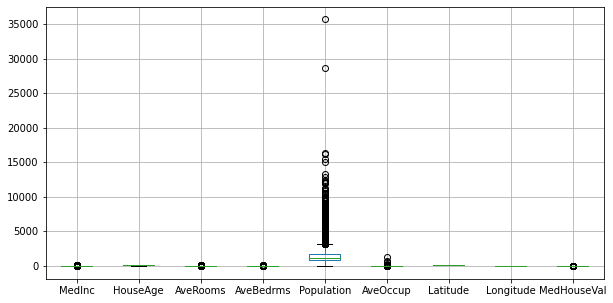

In [38]:
plt.figure(figsize=(10, 5))
all_df.boxplot()
plt.show()

Population에서 일부 크게 분포를 벗어나는 것이 있는 것으로 보여진다. Population외의 것들을 보기로 한다.

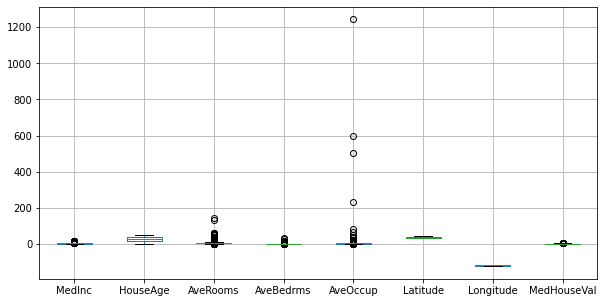

In [40]:
plt.figure(figsize=(10, 5))
all_df.boxplot(column = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'])
plt.show()

사실 예전에는 경도 위도가 무슨 소용이야 했는데, 요즈음에는 군집의 의미로서 의미가 존재한다는 것을 느끼긴 한다. 비슷한 곳에 위치한 것들이 비슷한 경도 위도를 가질 것이기 때문이다.

아니 무튼 그것 말고. AveOccup를 데려와본다.

<AxesSubplot:>

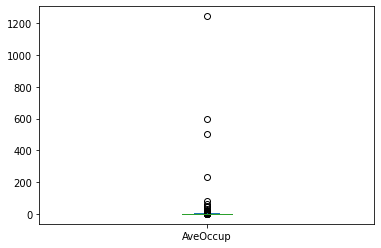

In [41]:
all_df['AveOccup'].plot.box()

<AxesSubplot:>

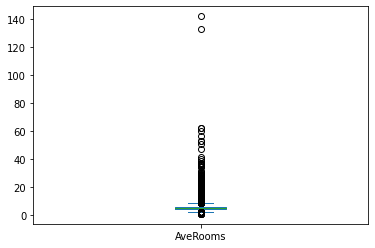

In [42]:
all_df['AveRooms'].plot.box()

정말 일부, 5개 이내의 갯수에서 크게 분포를 벗어나는 것으로 보이는 데이터들이 있는 것으로 보인다.

In [43]:
all_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [44]:
all_df[all_df['AveOccup'] > all_df['AveOccup'].quantile(0.75)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
58,1.2171,52.0,4.562500,1.121711,1074.0,3.532895,37.82,-122.28,0.803
61,6.1183,49.0,5.869565,1.260870,86.0,3.739130,37.82,-122.29,0.750
67,2.6094,52.0,6.986395,1.659864,492.0,3.346939,37.80,-122.29,0.813
68,1.8516,52.0,6.975610,1.329268,274.0,3.341463,37.81,-122.30,0.850
72,1.7500,49.0,5.552632,1.342105,560.0,3.684211,37.81,-122.29,0.750
...,...,...,...,...,...,...,...,...,...
20608,1.7167,24.0,5.400000,1.273171,768.0,3.746341,39.10,-121.59,0.488
20609,2.3011,18.0,4.856823,1.073826,1527.0,3.416107,39.11,-121.56,0.575
20615,2.3598,23.0,5.461929,1.096447,724.0,3.675127,39.08,-121.54,0.575
20619,2.7303,22.0,6.388514,1.148649,1023.0,3.456081,39.01,-121.56,0.991


In [45]:
quartile_1 = all_df.quantile(0.25)
quartile_3 = all_df.quantile(0.75)
IQR = quartile_3 - quartile_1
condition = (all_df < (quartile_1 - 1.5 * IQR)) | (all_df > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
search_df = all_df[condition]
# dropped_df = all_df.drop(search_df.index, axis=0)

In [46]:
search_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
41,1.2852,51.0,3.759036,1.248996,517.0,2.076305,37.83,-122.26,1.500
57,0.8172,52.0,6.102459,1.372951,728.0,2.983607,37.82,-122.28,0.853
59,2.5625,2.0,2.771930,0.754386,94.0,1.649123,37.82,-122.29,0.600
...,...,...,...,...,...,...,...,...,...
20608,1.7167,24.0,5.400000,1.273171,768.0,3.746341,39.10,-121.59,0.488
20620,4.5625,40.0,4.125000,0.854167,151.0,3.145833,39.05,-121.48,1.000
20621,2.3661,37.0,7.923567,1.573248,484.0,3.082803,39.01,-121.47,0.775
20629,2.0943,28.0,5.519802,1.020902,6912.0,3.801980,39.12,-121.39,1.083


2만여개에서 벌써 4천여개나 벗어나는 것으로 나타나고 있다. 

이대로는 데이터를 너무 많이 잃어버리지만, 분포를 벗어나는 것들로만 만들었을 때는 정확도가 어느정도 되는지는 보는게 좋을 것이라 생각된다.

# dataset1:  dropped by abnormal range


In [47]:
dropped_df = all_df.drop(search_df.index, axis=0)

In [48]:
dropped_df.shape

(16312, 9)

## 모델링 및 예측

In [51]:
# dataset
data = dropped_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
target = dropped_df['MedHouseVal']

In [52]:
# from sklearn import datasets
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# from sklearn import svm

# from sklearn.metrics import r2_score, mean_squared_error

# feature, target data select
X = data
y = target

# training data, test data division
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# Data standardization for X
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# SVM Regressor Analyzing
clf_svr_lr2 = svm.SVR(kernel = 'linear', epsilon = 0.1)
clf_svr_lr2.fit(X_tn_std, y_tn)

# # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
print('coef: ', clf_svr_lr2.coef_)
print('intercept: ', clf_svr_lr2.intercept_)

# predict y
svr_lr2_pred = clf_svr_lr2.predict(X_te_std)
print('pred: ',svr_lr2_pred)

# r-square score
r2 = r2_score(y_te, svr_lr2_pred)
print('r2 score:', r2)

# MSE
mse = mean_squared_error(y_te, svr_lr2_pred)
print('MSE: ', mse)

coef:  [[ 0.65024432  0.10204182 -0.14249153  0.08926719  0.04747142 -0.1886206
  -0.78734494 -0.74217267]]
intercept:  [1.85859783]
pred:  [2.40520961 1.36700114 2.11587596 ... 2.85808988 2.11262438 0.06751464]
r2 score: 0.6467639049134937
MSE:  0.31434702834484046


r제곱값이 상당히 상승한 것을 볼 수 있으며, MSE 값도 상당히 줄어든 것을 볼 수 있다. 시각적으로 보도록 해본다.

## 시각화

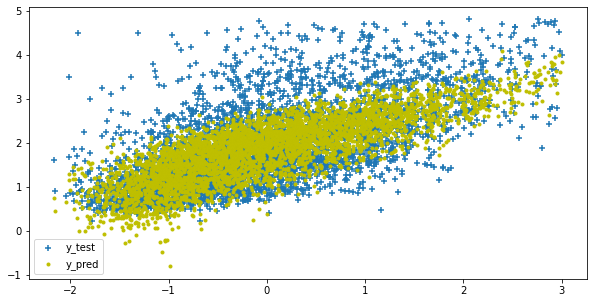

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

#예측값과 실제값의 분포
plt.figure(figsize=(10, 5))                                                           #표 크기 지정
plt.scatter(X_te_std[::, 0], y_te, label='y_test', marker = '+')                      #파란+, 실제값
plt.scatter(X_te_std[::, 0], svr_lr2_pred, c='y', label='y_pred', marker = '.')       #빨간점, 예측값
plt.legend(loc='best')                                     #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

어느정도 추정이 잘 된 것으로 보이는데, 

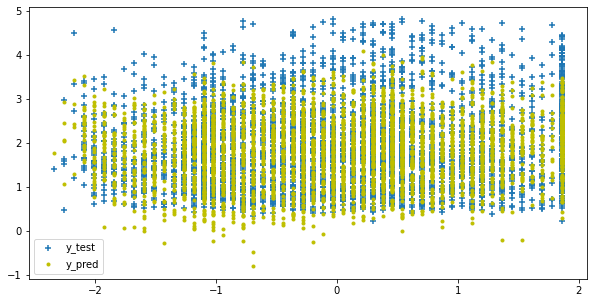

In [60]:
plt.figure(figsize=(10, 5))                                                           #표 크기 지정
plt.scatter(X_te_std[::, 1], y_te, label='y_test', marker = '+')                      #파란+, 실제값
plt.scatter(X_te_std[::, 1], svr_lr2_pred, c='y', label='y_pred', marker = '.')       #빨간점, 예측값
plt.legend(loc='best')                                     #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

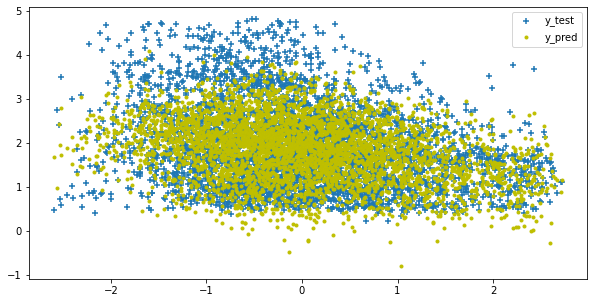

In [62]:
plt.figure(figsize=(10, 5))                                                           #표 크기 지정
plt.scatter(X_te_std[::, 5], y_te, label='y_test', marker = '+')                      #파란+, 실제값
plt.scatter(X_te_std[::, 5], svr_lr2_pred, c='y', label='y_pred', marker = '.')       #빨간점, 예측값
plt.legend(loc='best')                                     #범례(오른쪽 상단 박스)가 표시되는 위치 지정
plt.show()

결정계수와 상수항으로 그림도 그리고 싶은데 어렵다. 

아무튼 분포를 벗어나는 것들을 제외하기 전보다 상당히 많이 나아진 것을 볼 수 있다. 

이번에는 epsilon을 0.05 로 반을 낮춰본다.

## dataset1: epsilon = 0.05

In [51]:
# dataset
data = dropped_df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
target = dropped_df['MedHouseVal']

In [63]:
# from sklearn import datasets
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split

# from sklearn import svm

# from sklearn.metrics import r2_score, mean_squared_error

# feature, target data select
X = data
y = target

# training data, test data division
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# Data standardization for X
std_scale = StandardScaler()
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

# SVM Regressor Analyzing
clf_svr_lr2_ep05 = svm.SVR(kernel = 'linear', epsilon = 0.05)
clf_svr_lr2_ep05.fit(X_tn_std, y_tn)

# # w, b(추정계수, 상수항) 출력 : only 'linear'에서만
print('coef: ', clf_svr_lr2_ep05.coef_)
print('intercept: ', clf_svr_lr2_ep05.intercept_)

# predict y
svr_lr2_ep05_pred = clf_svr_lr2.predict(X_te_std)
print('pred: ',svr_lr2_ep05_pred)

# r-square score
r2 = r2_score(y_te, svr_lr2_ep05_pred)
print('r2 score:', r2)

# MSE
mse = mean_squared_error(y_te, svr_lr2_ep05_pred)
print('MSE: ', mse)

coef:  [[ 0.64672214  0.1013055  -0.13792578  0.08706989  0.04928901 -0.18737972
  -0.7936271  -0.75002269]]
intercept:  [1.85453959]
pred:  [2.40520961 1.36700114 2.11587596 ... 2.85808988 2.11262438 0.06751464]
r2 score: 0.6467639049134937
MSE:  0.31434702834484046


r2 스코어가 그대로 같게, 0.6467639049134937 나왔다. 내가 뭐 잘못했나? 하지만 아니다. (?)

행여 다르다고 하더라도 크게 다를 것이 없을 것으로 보이기도 하는 것이, 이미 어느정도 데이터에 잘 적합 되었음이 그래프에서 보였기 때문이다. 

벗어나는 것들은 어느정도 벗어나는 대로 두어야 un-seen data에 대해서도 강해지지 않을까.

# dataset2: dropped extremely abnormal

이번에는 정말 정말 범위를 벗어나는 데이터만 지우는 것으로 해본다.
